In [1]:
import pandas as pd
import numpy as np

raw_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/covtype/covtype.data.gz', names=range(0, 55))
df = raw_df.sample(10000, random_state=8) # Sampling so computing doesn't take as long

In [2]:
X = df[range(0, 54)].to_numpy()
y = df[54].to_numpy()

In [3]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_labels = encoder.fit_transform(y.reshape(-1, 1))

y = encoded_labels.toarray()

y.shape

(10000, 7)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape); print(X_test.shape)

(8000, 54)
(2000, 54)


In [5]:
y_test.shape, y_train.shape

((2000, 7), (8000, 7))

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(neurons=64, activation_1='linear', activation_2='linear', optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim=54, activation=activation_1))
    model.add(Dense(neurons/2, activation=activation_2))
    model.add(Dense(round(neurons/3), activation=activation_2))
    model.add(Dense(7, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

2023-04-14 20:22:54.306026: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-04-14 20:22:54.307273: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 20:22:54.334202: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-14 20:22:54.334767: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-14 20:22:54.667606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [7]:
neurons = [100, 64, 32]
activation_1 = ['relu', 'tanh', 'sigmoid','linear']
activation_2 = ['relu', 'tanh', 'sigmoid','linear']
optimizer = ['SGD', 'Adam']

param_grid = dict(neurons=neurons,
                  activation_1=activation_1,
                  activation_2=activation_2,
                  optimizer=optimizer)

In [8]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

model = KerasClassifier(model=create_model, batch_size=20, epochs=100, verbose=1,
                        neurons=neurons, activation_1=activation_1, activation_2=activation_2,
                        optimizer=optimizer)
                        

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)

grid_result = grid.fit(X_train, y_train)

2023-04-14 20:22:56.085910: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.154440: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.159541: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.189558: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.258594: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.275426: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.280137: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-14 20:22:56.284575: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2023-04-

Epoch 1/100
Epoch 1/100
Epoch 1/100


2023-04-14 20:22:57.207869: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.222894: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.228508: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.253776: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.371600: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.375235: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ER

Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100
Epoch 1/100


2023-04-14 20:22:57.420447: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.439239: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-04-14 20:22:57.518587: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


Epoch 1/100
  1/320 [..............................] - ETA: 2:52 - loss: 525.5095 - accuracy: 0.0500Epoch 1/100
Epoch 1/100
 34/320 [==>...........................] - ETA: 0s - loss: 122.2658 - accuracy: 0.3441  Epoch 1/100
Epoch 1/100
 58/320 [====>.........................] - ETA: 0s - loss: 81.2853 - accuracy: 0.3603 Epoch 1/100
Epoch 1/100
320/320 [==============================] - 1s 2ms/step - loss: 27.5289 - accuracy: 0.4297  
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 16.6502 - accuracy: 0.3755
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 12.2402 - accuracy: 0.4344
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 5.9781 - accuracy: 0.4364
Epoch 3/100
320/320 [==============================] - 1s 2ms/step - loss: 12.4248 - accuracy: 0.3697
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 34.4436 - accuracy: 0.4036
Epoch 2/100
320/320 [==============================] 

2023-04-14 23:41:10.092671: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


400/400 [==============================] - 0s 441us/step - loss: 19.7301 - accuracy: 0.4124
Epoch 2/100
400/400 [==============================] - 0s 430us/step - loss: 4.3123 - accuracy: 0.4540
Epoch 3/100
400/400 [==============================] - 0s 398us/step - loss: 3.0190 - accuracy: 0.4860
Epoch 4/100
400/400 [==============================] - 0s 403us/step - loss: 2.4535 - accuracy: 0.5069
Epoch 5/100
400/400 [==============================] - 0s 412us/step - loss: 2.3071 - accuracy: 0.5254
Epoch 6/100
400/400 [==============================] - 0s 419us/step - loss: 1.8694 - accuracy: 0.5406
Epoch 7/100
400/400 [==============================] - 0s 402us/step - loss: 1.8105 - accuracy: 0.5391
Epoch 8/100
400/400 [==============================] - 0s 400us/step - loss: 1.6249 - accuracy: 0.5636
Epoch 9/100
400/400 [==============================] - 0s 446us/step - loss: 1.3767 - accuracy: 0.5792
Epoch 10/100
400/400 [==============================] - 0s 426us/step - loss: 1.1612

In [9]:
params = grid_result.best_params_

grid_result.best_score_, grid_result.best_params_

(0.710875,
 {'activation_1': 'relu',
  'activation_2': 'relu',
  'neurons': 100,
  'optimizer': 'SGD'})

In [10]:
# Now lets find best batch size and epochs

batch_size = [10, 25, 50]
epochs = [50, 100, 200]
param_grid_2 = dict(batch_size=batch_size, epochs=epochs)


In [11]:
model_2 = KerasClassifier(model=create_model, activation_1=params['activation_1'],
                                              activation_2=params['activation_2'],
                                              neurons=params['neurons'],
                                              optimizer=params['optimizer'],
                                              verbose=1)

grid_2 = GridSearchCV(estimator=model_2, param_grid=param_grid_2, n_jobs=-1, cv=3)
grid_result_2 = grid_2.fit(X_train, y_train)

Epoch 1/50
Epoch 1/200
Epoch 1/200
Epoch 1/50
Epoch 1/200
Epoch 1/100
Epoch 1/100
Epoch 1/200
Epoch 1/50
Epoch 1/50
Epoch 1/200
Epoch 1/100
Epoch 1/50
Epoch 1/50
Epoch 1/200
Epoch 1/100
Epoch 1/100
Epoch 1/50
Epoch 1/100
Epoch 1/50
107/107 [==============================] - 1s 2ms/step - loss: 24.2379 - accuracy: 0.4018  
Epoch 2/50
107/107 [==============================] - 0s 2ms/step - loss: 5.1705 - accuracy: 0.4326
Epoch 3/50
214/214 [==============================] - 1s 2ms/step - loss: 10.5017 - accuracy: 0.4166
Epoch 2/100
214/214 [==============================] - 1s 2ms/step - loss: 23.2600 - accuracy: 0.4300
Epoch 2/200
214/214 [==============================] - 1s 2ms/step - loss: 25.5862 - accuracy: 0.4003
Epoch 2/50
214/214 [==============================] - 1s 2ms/step - loss: 24.4285 - accuracy: 0.3868
Epoch 2/200
214/214 [==============================] - 1s 2ms/step - loss: 28.2025 - accuracy: 0.3728
Epoch 2/50
107/107 [==============================] - 0s 3ms/step - 

In [12]:
params_2 = grid_result_2.best_params_
grid_result_2.best_score_, grid_result_2.best_params_

(0.7207493193133304, {'batch_size': 25, 'epochs': 200})

Best model

In [13]:
# Lets sample another 2000 samples from dataset for eval, exluding the ones we sampled before

merged_df = pd.merge(raw_df, df, how='outer', indicator=True)
eval_df = merged_df[merged_df['_merge'] == 'left_only'][raw_df.columns]
eval_df = eval_df.sample(2000, random_state=23)

X_eval = eval_df[range(0, 54)].to_numpy()
y_eval = eval_df[54].to_numpy()

encoded_val_labels = encoder.fit_transform(y_eval.reshape(-1, 1))
y_eval = encoded_val_labels.toarray()

y_eval.shape

(2000, 7)

In [47]:
from sklearn.metrics import accuracy_score

best_model = create_model(activation_1=params['activation_1'],
                           activation_2=params['activation_2'],
                           neurons=params['neurons'],
                        #  optimizer=params['optimizer'] Commenting out optimizer, it makes accuraccy static
                         )

history = best_model.fit(X_train, y_train, validation_data=(X_eval, y_eval), verbose=2, epochs=params_2['epochs'], batch_size=params_2['batch_size'])

pred = best_model.predict(X_test)

Epoch 1/200
320/320 - 1s - loss: 8.6414 - accuracy: 0.4260 - val_loss: 3.4546 - val_accuracy: 0.4625 - 517ms/epoch - 2ms/step
Epoch 2/200
320/320 - 0s - loss: 2.4480 - accuracy: 0.4622 - val_loss: 2.5180 - val_accuracy: 0.4970 - 201ms/epoch - 627us/step
Epoch 3/200
320/320 - 0s - loss: 1.8555 - accuracy: 0.4864 - val_loss: 1.5940 - val_accuracy: 0.4665 - 213ms/epoch - 664us/step
Epoch 4/200
320/320 - 0s - loss: 1.4530 - accuracy: 0.5130 - val_loss: 1.4117 - val_accuracy: 0.5245 - 195ms/epoch - 609us/step
Epoch 5/200
320/320 - 0s - loss: 1.3397 - accuracy: 0.5176 - val_loss: 1.2551 - val_accuracy: 0.5210 - 191ms/epoch - 598us/step
Epoch 6/200
320/320 - 0s - loss: 1.3298 - accuracy: 0.5259 - val_loss: 1.5982 - val_accuracy: 0.5080 - 192ms/epoch - 598us/step
Epoch 7/200
320/320 - 0s - loss: 1.2505 - accuracy: 0.5480 - val_loss: 1.3801 - val_accuracy: 0.5540 - 206ms/epoch - 643us/step
Epoch 8/200
320/320 - 0s - loss: 1.2324 - accuracy: 0.5464 - val_loss: 1.1738 - val_accuracy: 0.5205 - 189

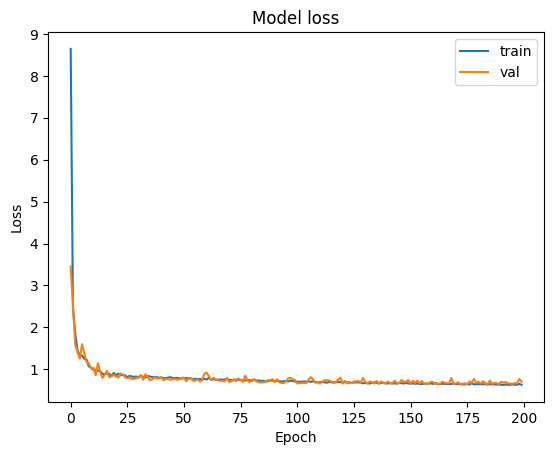

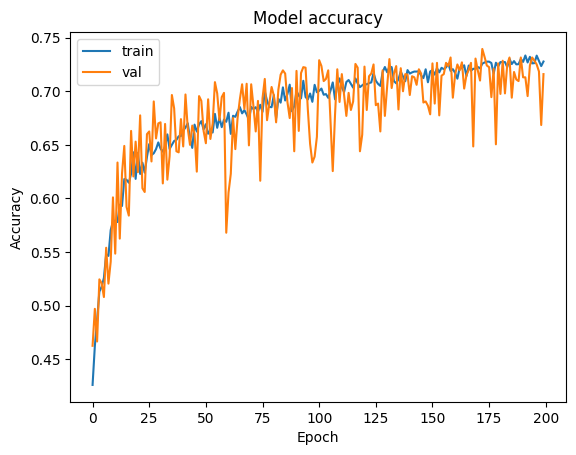

In [49]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [50]:
# Accuracy would definitly improve with bigger sample size

accuracy_score(np.round(pred), y_test)


0.702

Saving model


In [51]:
# Fitting all 10 000 samples to the model, so the training content is consistant with shallow models

final_model = create_model(activation_1=params['activation_1'],
                           activation_2=params['activation_2'],
                           neurons=params['neurons'])

final_model.fit(X, y, verbose=0, epochs=params_2['epochs'], batch_size=params_2['batch_size'])

In [52]:
final_model.save('NN_clf')

INFO:tensorflow:Assets written to: NN_clf/assets


INFO:tensorflow:Assets written to: NN_clf/assets
